In [1]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import arviz as az

In [2]:
data = pd.read_csv("linear_model.txt",delimiter='\t',header=None)
data.columns=['x','y','dy']

In [3]:
def f(x,a,b):
    return a*np.cos(x)+b
popt, pcov = curve_fit(f,data['x'].values,data['y'].values,p0=[2,2],sigma=data['dy'].values)

In [4]:
model = sp.CmdStanModel(stan_file='./stan_file.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/jakob/Documents/Studium/master_thesis/bayes/stan_file


In [5]:
stan_data={'n':len(data['x'].values),
             'x':list(data['x'].values),
             'y':list(data['y'].values),
           'dy':list(data['dy'].values)
}

fit = model.sample(data=stan_data,chains=4)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


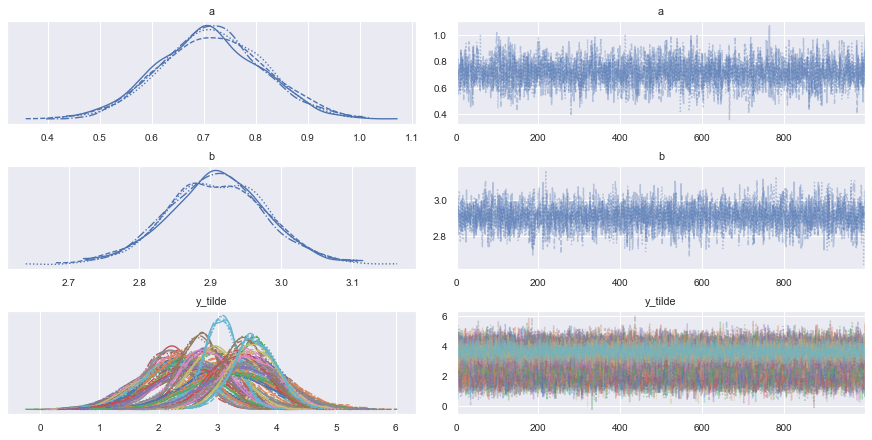

In [6]:
az.plot_trace(fit)
plt.show()

In [7]:
summary=az.summary(fit)
samples=fit.draws_pd()
#samples
plt.show()
#to do: quantile aus a und b (0.1 und 0.9) ->plotten

In [8]:
trace_thing=[]
for i in range(len(samples)):
    trace_thing.append(samples['a'][i]*np.cos(data['x'].values)+samples['b'][i])


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


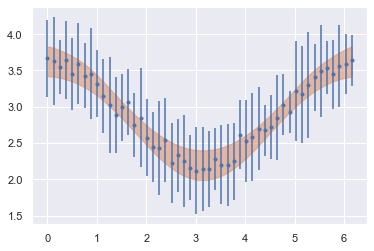

In [9]:
plt.errorbar(x=data['x'],y=data['y'],yerr=data['dy'],fmt='.')
az.plot_hdi(data['x'].values,trace_thing,hdi_prob=.90)
plt.show()

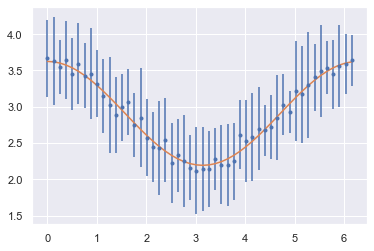

array([0.7158152 , 2.90910924])

In [10]:
yfit=f(data['x'],*popt)
plt.errorbar(x=data['x'],y=data['y'],yerr=data['dy'],fmt='.')
plt.plot(data['x'],yfit)
plt.show()
popt

In [11]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,0.715,0.100,0.528,0.905,0.002,0.001,3323.0,3323.0,3316.0,2711.0,1.0
b,2.909,0.069,2.782,3.041,0.001,0.001,3944.0,3942.0,3947.0,2284.0,1.0
y_tilde[0],3.635,0.540,2.547,4.569,0.009,0.006,3590.0,3584.0,3592.0,3556.0,1.0
y_tilde[1],3.606,0.625,2.415,4.737,0.010,0.007,3939.0,3939.0,3944.0,3972.0,1.0
y_tilde[2],3.595,0.378,2.909,4.330,0.006,0.004,3649.0,3634.0,3654.0,3630.0,1.0
y_tilde[3],3.564,0.548,2.539,4.603,0.009,0.006,3921.0,3921.0,3918.0,3524.0,1.0
y_tilde[4],3.548,0.512,2.485,4.424,0.008,0.006,4079.0,4016.0,4079.0,3804.0,1.0
y_tilde[5],3.491,0.574,2.350,4.507,0.009,0.006,4025.0,4025.0,4019.0,4046.0,1.0
y_tilde[6],3.420,0.464,2.577,4.315,0.007,0.005,3888.0,3841.0,3892.0,4082.0,1.0
y_tilde[7],3.347,0.625,2.127,4.483,0.010,0.007,4231.0,4231.0,4231.0,4081.0,1.0


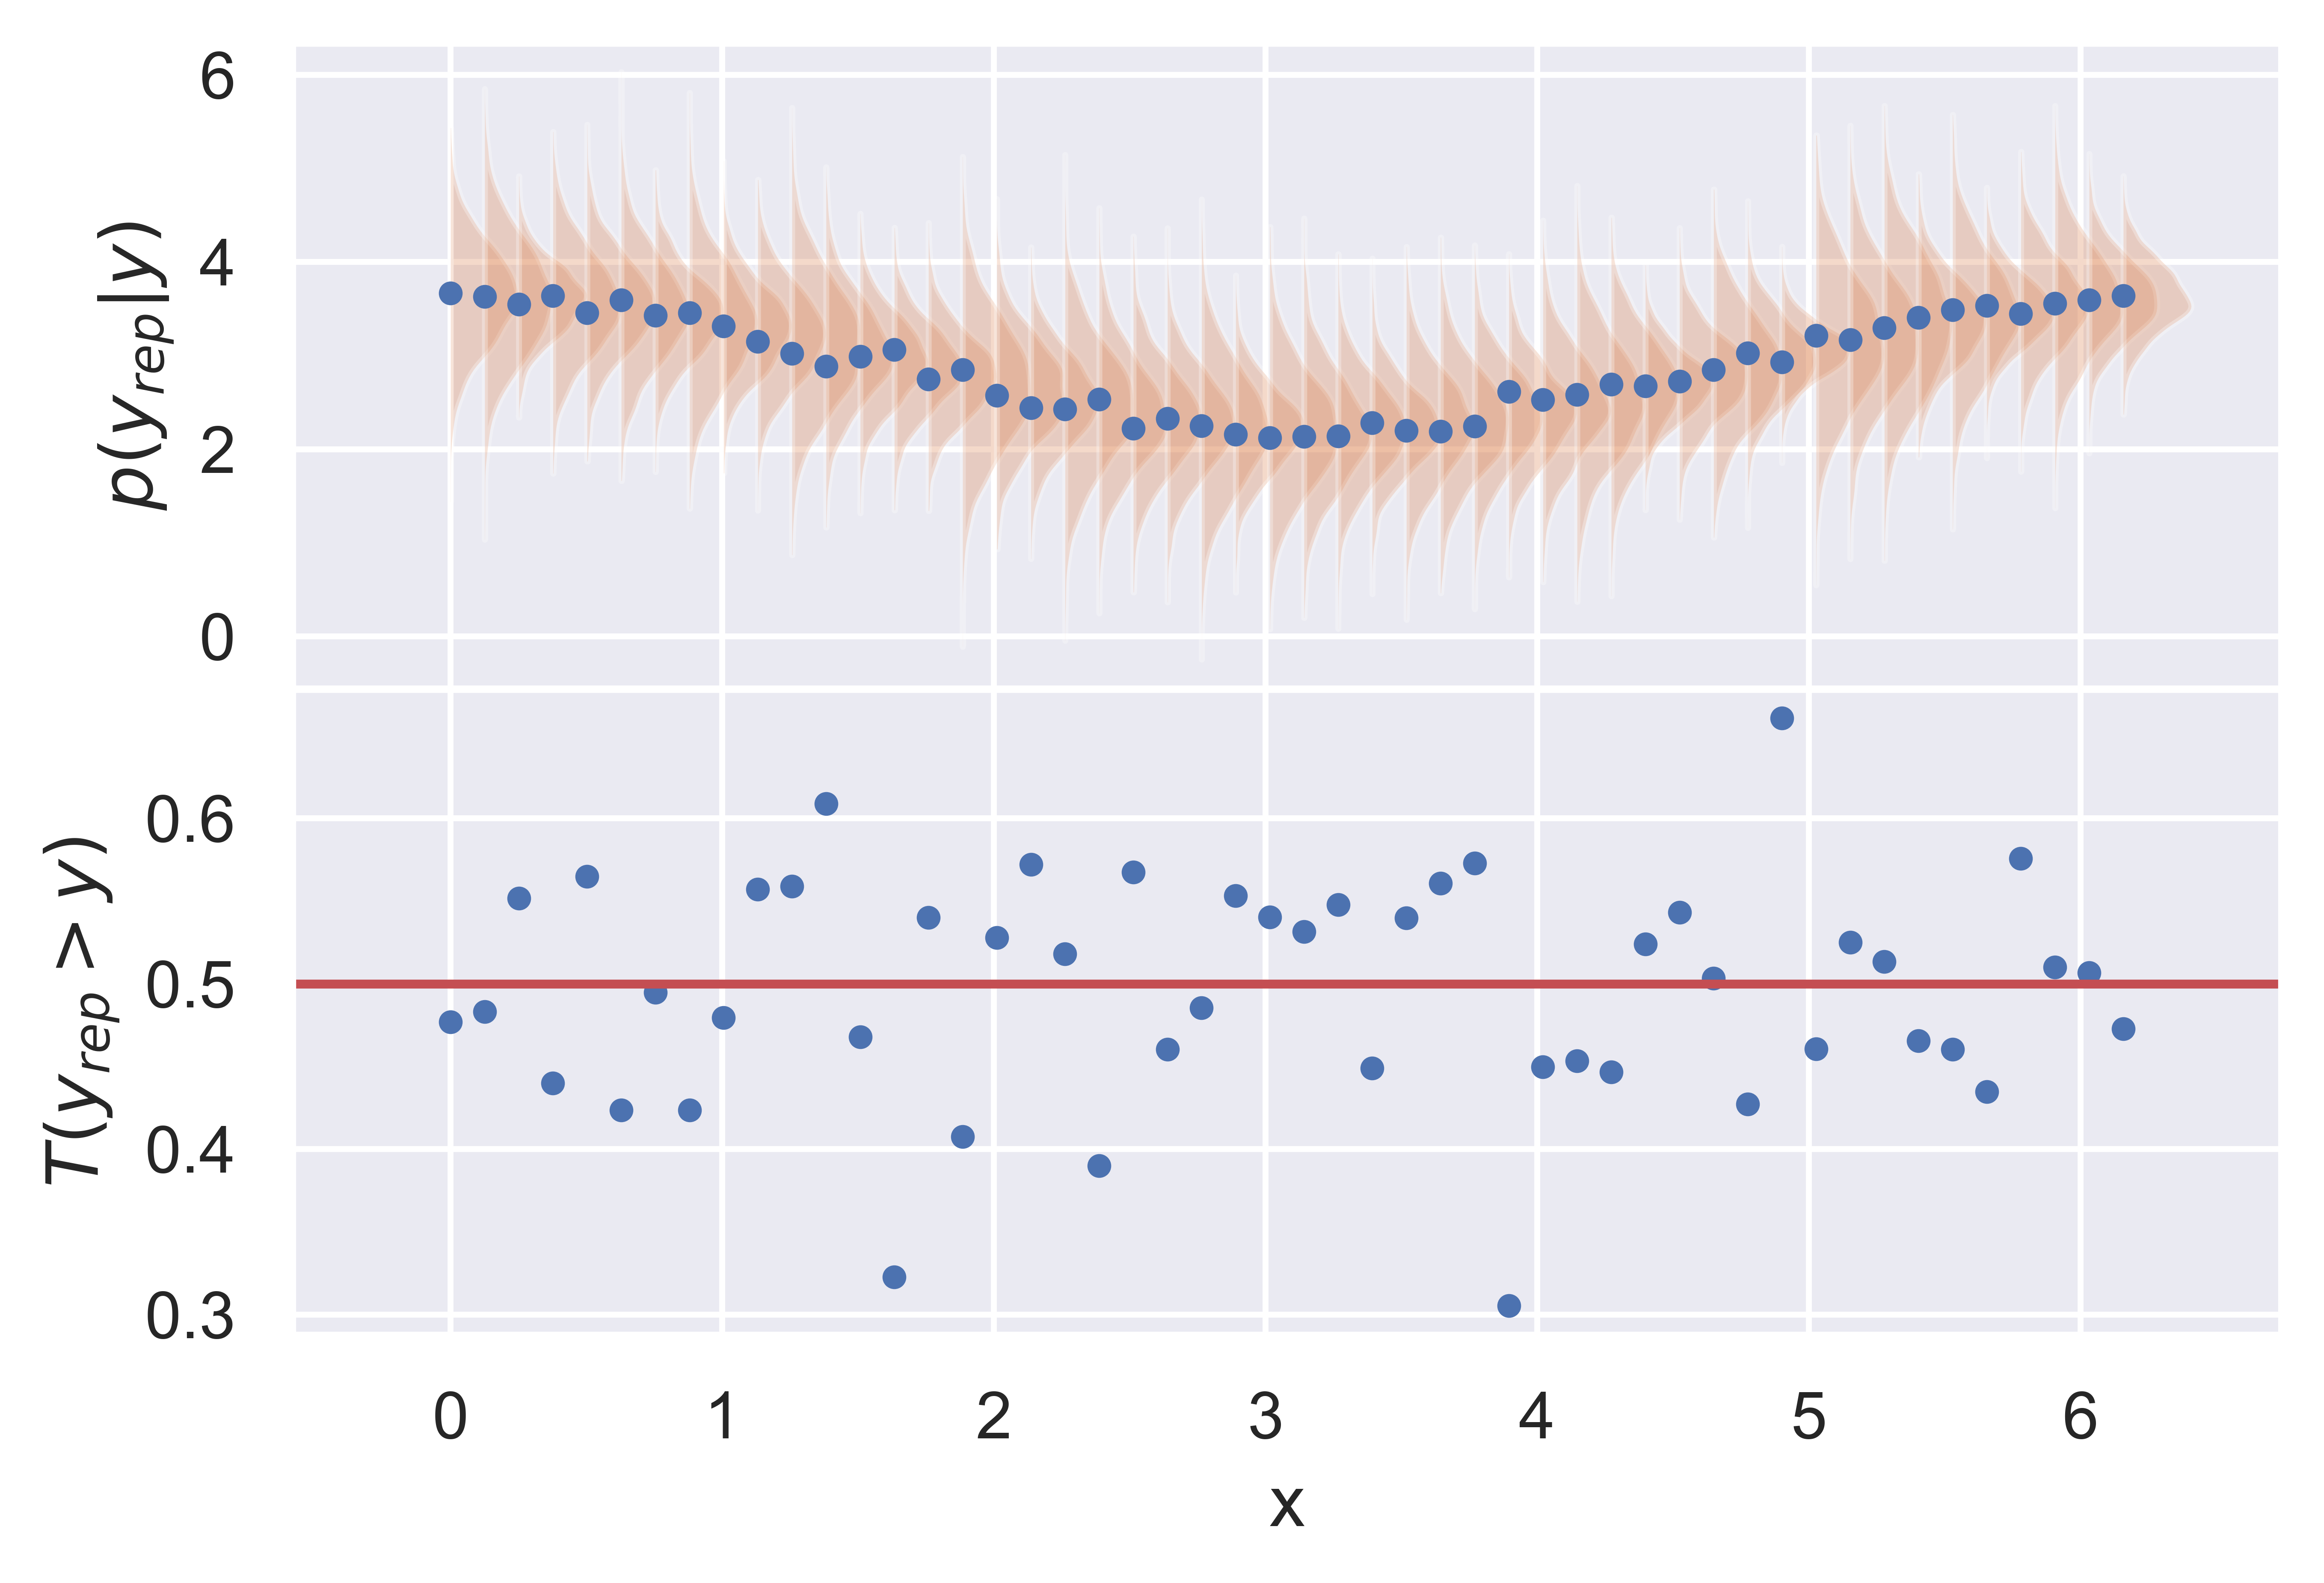

In [12]:
fig, (ax, ax1)=plt.subplots(nrows=2,sharex=True,dpi=1000)
ax.set_ylabel('$p(y_{rep}|y)$')
ax.plot(data['x'],data['y'],'.')
vp=ax.violinplot([samples[f'y_tilde[{i+1}]']for i in range(50)],data['x'],showmeans=False, showextrema=False, showmedians=False)
for b in vp['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
y_arr=[samples[f'y_tilde[{i+1}]']for i in range(50)]
pvalue=[len([y for y in y_arr[i] if y>=data['y'][i]])/len(y_arr[i])for i in range(50)]

ax1.plot(data['x'],pvalue,'.')
ax1.axhline(y=0.5, color='r', linestyle='-')
ax1.set_xlabel('x')
ax1.set_ylabel('$T(y_{rep}>y)$')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plot.pdf',format='pdf',bbox_inches='tight',dpi=1000)
plt.show()
